In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge


In [3]:
df  = pd.read_csv('Dataset_new.csv')

In [4]:
df=df.rename(columns={'Company Name':'Company_Name','Car Age': 'Car_Age' })

In [5]:
df.head()

,Company_Name,Model,price,km,Owner,Car_Age,fuel,location,Model_rank,fuel_rank
0,ASTON,MARTIN,7500000,15500,3,11,Petrol,Delhi,84,5
1,ASTON,MARTIN,5990000,15200,2,10,Petrol,Mumbai,84,5
2,AUDI,Q5,1299991,65345,1,10,Diesel,Kolkata,32,6
3,AUDI,A3,2690000,12000,1,3,Petrol,Delhi,48,5
4,AUDI,A6,1700000,78000,1,7,Diesel,Delhi,24,6


In [6]:
df.shape

(3691, 10)

In [7]:
df.isnull().sum()

Company_Name    0
Model           0
price           0
km              0
Owner           0
Car_Age         0
fuel            0
location        0
Model_rank      0
fuel_rank       0
dtype: int64

In [8]:
df.drop(columns=['Model_rank', 'fuel_rank'],axis=1,inplace=True)

In [9]:
df.head()

,Company_Name,Model,price,km,Owner,Car_Age,fuel,location
0,ASTON,MARTIN,7500000,15500,3,11,Petrol,Delhi
1,ASTON,MARTIN,5990000,15200,2,10,Petrol,Mumbai
2,AUDI,Q5,1299991,65345,1,10,Diesel,Kolkata
3,AUDI,A3,2690000,12000,1,3,Petrol,Delhi
4,AUDI,A6,1700000,78000,1,7,Diesel,Delhi


In [10]:
df.drop(df.loc[df['location']=='Ranchi'].index, inplace=True)
df.drop(df.loc[df['location']=='Rajkot'].index, inplace=True)
df.drop(df.loc[df['location']=='Akola'].index, inplace=True)
df.drop(df.loc[df['location']=='Raipur'].index, inplace=True)
df.drop(df.loc[df['location']=='Jamshedpur'].index, inplace=True)
df.drop(df.loc[df['location']=='Tiruchirappalli'].index, inplace=True)
df.drop(df.loc[df['location']=='Vadodara'].index, inplace=True)
df.drop(df.loc[df['location']=='Surat'].index, inplace=True)
df.drop(df.loc[df['location']=='Kalamassery'].index, inplace=True)
df.drop(df.loc[df['location']=='Indore'].index, inplace=True)
df.drop(df.loc[df['location']=='Kochi'].index, inplace=True)
df.drop(df.loc[df['location']=='Karnal'].index, inplace=True)
df.drop(df.loc[df['location']=='location'].index, inplace=True)

In [10]:
df.reset_index(drop=True,inplace=True)


In [11]:
df['location'].value_counts()

Mumbai                866
Delhi                 445
Hyderabad             435
Bangalore             321
Pune                  266
Chennai               243
Ahmedabad             146
Kolkata               135
Thane                 131
Coimbatore            118
Jaipur                 60
Nashik                 56
Bhopal                 53
Noida                  49
Navi Mumbai            47
Gurgaon                35
Faridabad              33
Ghaziabad              28
Thiruvananthapuram     24
Bellary                23
Mangalore              23
Kollam                 22
Mysore                 22
Aurangabad             22
Nagpur                 12
Lucknow                12
Pondicherry            10
Karnal                  7
Indore                  7
Kalamassery             6
Surat                   6
Vadodara                5
Tiruchirappalli         5
Kochi                   5
Jamshedpur              4
Raipur                  3
Ranchi                  2
Akola                   2
Rajkot      

In [12]:
df["location"].replace({"Ghaziabad": "Delhi","Noida":"Delhi","Gurgaon":"Delhi","Faridabad":"Delhi"}, inplace=True)

df["location"].replace({"Mangalore": "Bangalore","Mysore":"Bangalore","Bellary":"Bangalore"}, inplace=True)

df["location"].replace({"Pondicherry": "Chennai"}, inplace=True)

df["location"].replace({"Kollam": "Thiruvananthapuram"}, inplace=True)

df["location"].replace({"Lucknow": "Bhopal"}, inplace=True)

df["location"].replace({"Aurangabad": "Nagpur", "Nashik": "Nagpur"}, inplace=True)

In [13]:
df['location'].value_counts()

Mumbai                866
Delhi                 590
Hyderabad             435
Bangalore             389
Pune                  266
Chennai               253
Ahmedabad             146
Kolkata               135
Thane                 131
Coimbatore            118
Nagpur                 90
Bhopal                 65
Jaipur                 60
Navi Mumbai            47
Thiruvananthapuram     46
Karnal                  7
Indore                  7
Surat                   6
Kalamassery             6
Tiruchirappalli         5
Vadodara                5
Kochi                   5
Jamshedpur              4
Raipur                  3
Ranchi                  2
Akola                   2
Rajkot                  2
Name: location, dtype: int64

In [14]:
df['Company_Name'].value_counts()

MARUTI SUZUKI    702
HYUNDAI          587
HONDA            398
TOYOTA           370
VOLKSWAGEN       260
MERCEDES-BENZ    251
BMW              168
TATA             160
MAHINDRA         127
AUDI             115
FORD              93
RENAULT           81
SKODA             80
LAND              51
NISSAN            35
PORSCHE           30
JAGUAR            30
JEEP              24
VOLVO             21
CHEVROLET         16
KIA               14
DATSUN            13
MINI              11
FIAT              11
MITSUBISHI        11
MG                 9
BENTLEY            6
SSANGYONG          4
LAMBORGHINI        3
LEXUS              3
FORCE              2
ASTON              2
MASERATI           1
ISUZU              1
HUMMER             1
Name: Company_Name, dtype: int64

In [15]:
df.drop(df.loc[df['Company_Name']=='MASERATI'].index, inplace=True)
df.drop(df.loc[df['Company_Name']=='HUMMER'].index, inplace=True)
df.drop(df.loc[df['Company_Name']=='ISUZU'].index, inplace=True)
df.drop(df.loc[df['Company_Name']=='ASTON'].index, inplace=True)
df.drop(df.loc[df['Company_Name']=='FORCE'].index, inplace=True)
df.drop(df.loc[df['Company_Name']=='LEXUS'].index, inplace=True)
df.drop(df.loc[df['Company_Name']=='LAMBORGHINI'].index, inplace=True)
df.drop(df.loc[df['Company_Name']=='SSANGYONG'].index, inplace=True)
df.drop(df.loc[df['Company_Name']=='BENTLEY'].index, inplace=True)
df.drop(df.loc[df['Company_Name']=='MG'].index, inplace=True)

In [16]:
df.reset_index(drop=True,inplace=True)

In [17]:
df['Company_Name'].value_counts()

MARUTI SUZUKI    702
HYUNDAI          587
HONDA            398
TOYOTA           370
VOLKSWAGEN       260
MERCEDES-BENZ    251
BMW              168
TATA             160
MAHINDRA         127
AUDI             115
FORD              93
RENAULT           81
SKODA             80
LAND              51
NISSAN            35
JAGUAR            30
PORSCHE           30
JEEP              24
VOLVO             21
CHEVROLET         16
KIA               14
DATSUN            13
MITSUBISHI        11
FIAT              11
MINI              11
Name: Company_Name, dtype: int64

In [18]:
df['fuel'].value_counts()

Diesel      1853
Petrol      1746
CNG           47
LPG           11
Electric       2
Name: fuel, dtype: int64

In [19]:
df.drop(df.loc[df['fuel']=='Electric'].index, inplace=True)

In [20]:
df.reset_index(drop=True,inplace=True)

In [21]:
df['fuel'].value_counts()

Diesel    1853
Petrol    1746
CNG         47
LPG         11
Name: fuel, dtype: int64

In [22]:
df['Model'].value_counts()

INNOVA           179
CITY             154
POLO             130
GRAND            109
ELITE             90
                ... 
GRAND VITARA       1
NUVOSPORT          1
S-CROSS DELTA      1
ALTO STD           1
IKON               1
Name: Model, Length: 263, dtype: int64

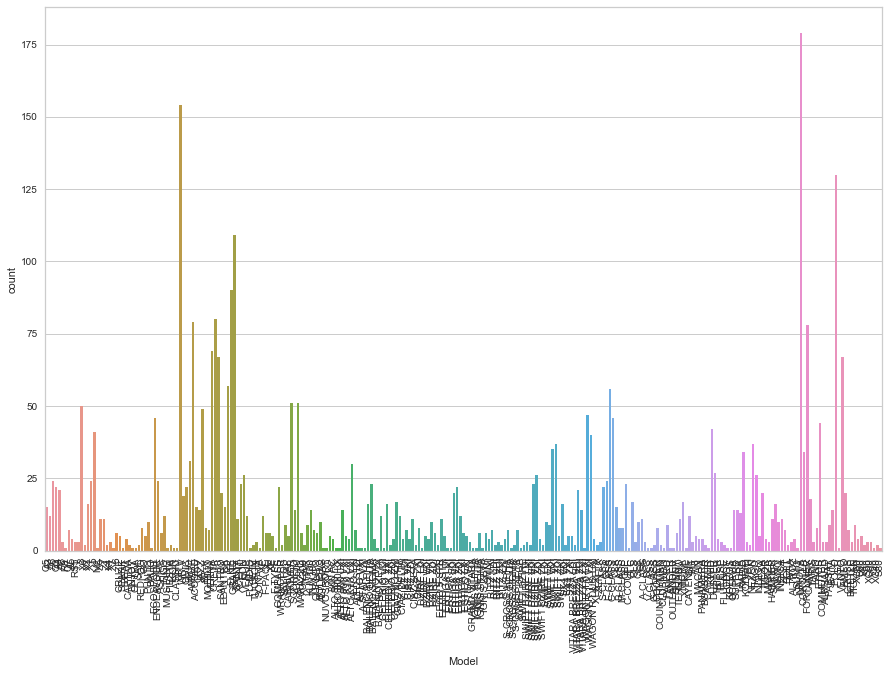

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x='Model',data= df)
plt.xticks(rotation=90)
plt.show()

In [24]:
df.head()

,Company_Name,Model,price,km,Owner,Car_Age,fuel,location
0,AUDI,Q5,1299991,65345,1,10,Diesel,Kolkata
1,AUDI,A3,2690000,12000,1,3,Petrol,Delhi
2,AUDI,A6,1700000,78000,1,7,Diesel,Delhi
3,AUDI,A6,1399991,53055,1,8,Diesel,Kolkata
4,AUDI,Q3,2975000,14000,1,3,Diesel,Delhi


In [25]:
df.shape

(3657, 8)

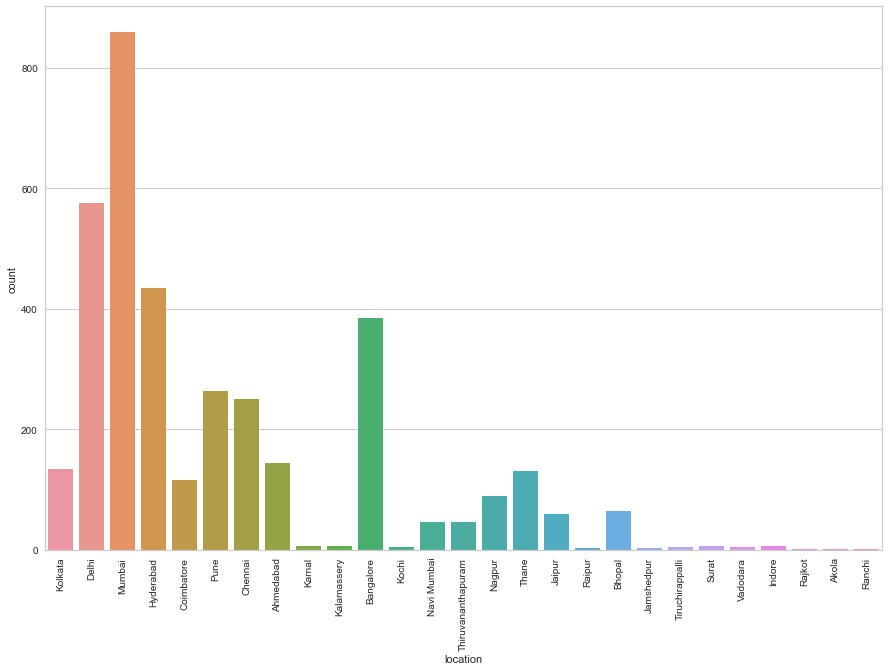

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(x='location',data= df)
plt.xticks(rotation=90)
plt.show()

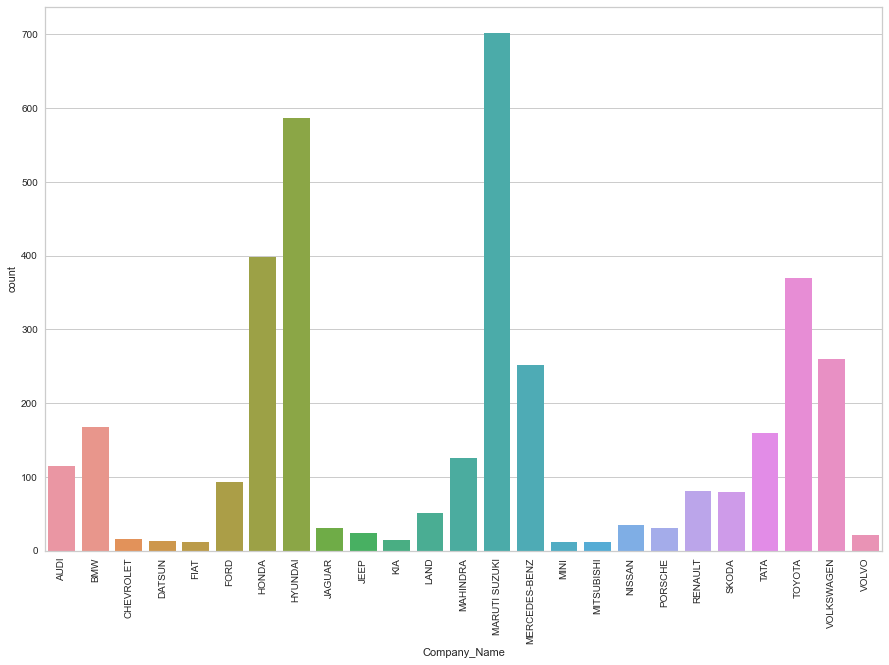

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(x='Company_Name',data= df)
plt.xticks(rotation=90)
plt.show()

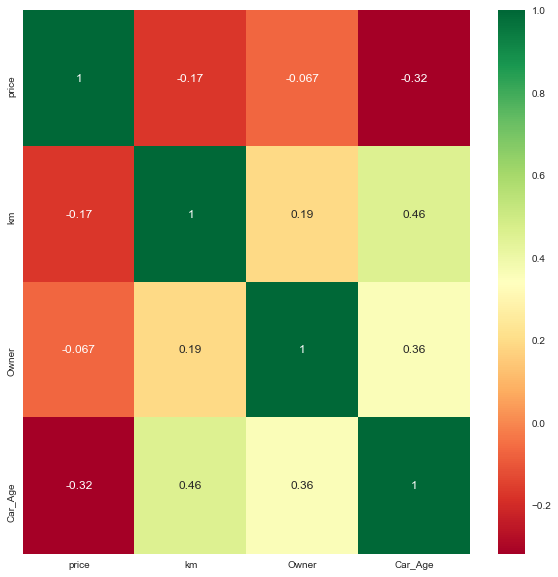

In [28]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:xlabel='km', ylabel='Density'>

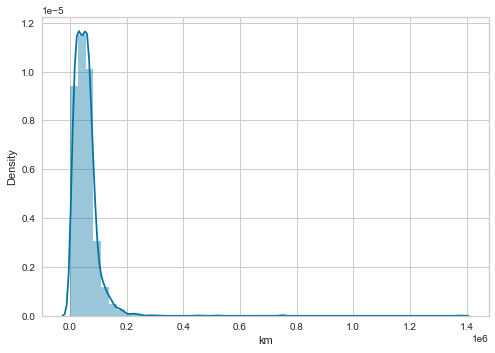

In [29]:
sns.distplot(df['km'])


<AxesSubplot:xlabel='Car_Age', ylabel='Density'>

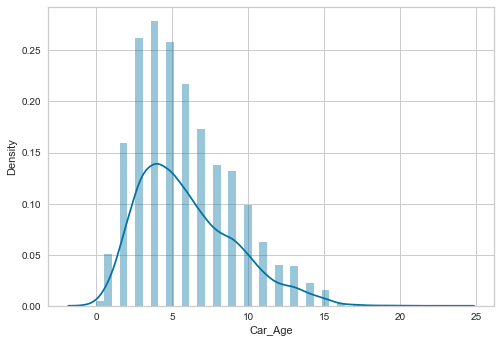

In [30]:
sns.distplot(df['Car_Age'])

<AxesSubplot:xlabel='price', ylabel='Density'>

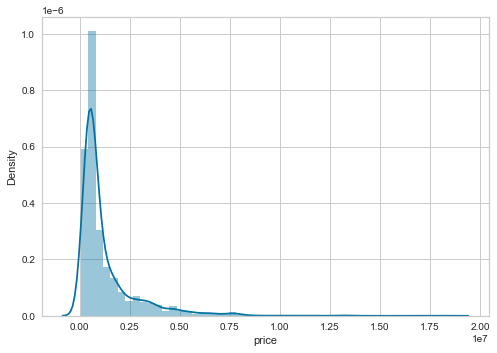

In [31]:
sns.distplot(df['price'])

In [32]:
df_cont = df[['Car_Age','km']]

In [33]:
df_cat=df[['Company_Name','location','Model', 'fuel','Owner']]

In [34]:
#df_cat=df[['Company Name','Model', 'fuel','Owner']]

In [35]:
df_dum=pd.get_dummies(df_cat,drop_first=True)

In [36]:
X=pd.merge(df_cont,df_dum,on=df_cat.index)
y= df[['price']]

In [37]:
X.shape

(3657, 319)

In [48]:
df.head()

,Company_Name,Model,price,km,Owner,Car_Age,fuel,location
0,AUDI,Q5,1299991,65345,1,10,Diesel,Kolkata
1,AUDI,A3,2690000,12000,1,3,Petrol,Delhi
2,AUDI,A6,1700000,78000,1,7,Diesel,Delhi
3,AUDI,A6,1399991,53055,1,8,Diesel,Kolkata
4,AUDI,Q3,2975000,14000,1,3,Diesel,Delhi


In [57]:
X.head()

,key_0,Car_Age,km,Owner,Company_Name_BMW,Company_Name_CHEVROLET,Company_Name_DATSUN,Company_Name_FIAT,Company_Name_FORD,Company_Name_HONDA,...,Model_XUV500,Model_XYLO,Model_YARIS,Model_YETI,Model_Z4,Model_ZEN LX,Model_ZEST,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0,10,65345,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,3,12000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,7,78000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,8,53055,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,3,14000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
s=X.columns
for i in s:
    print(i)

key_0
Car_Age
km
Owner
Company_Name_BMW
Company_Name_CHEVROLET
Company_Name_DATSUN
Company_Name_FIAT
Company_Name_FORD
Company_Name_HONDA
Company_Name_HYUNDAI
Company_Name_JAGUAR
Company_Name_JEEP
Company_Name_KIA
Company_Name_LAND
Company_Name_MAHINDRA
Company_Name_MARUTI SUZUKI
Company_Name_MERCEDES-BENZ
Company_Name_MINI
Company_Name_MITSUBISHI
Company_Name_NISSAN
Company_Name_PORSCHE
Company_Name_RENAULT
Company_Name_SKODA
Company_Name_TATA
Company_Name_TOYOTA
Company_Name_VOLKSWAGEN
Company_Name_VOLVO
location_Akola
location_Bangalore
location_Bhopal
location_Chennai
location_Coimbatore
location_Delhi
location_Hyderabad
location_Indore
location_Jaipur
location_Jamshedpur
location_Kalamassery
location_Karnal
location_Kochi
location_Kolkata
location_Mumbai
location_Nagpur
location_Navi Mumbai
location_Pune
location_Raipur
location_Rajkot
location_Ranchi
location_Surat
location_Thane
location_Thiruvananthapuram
location_Tiruchirappalli
location_Vadodara
Model_5
Model_6
Model_7
Model_

In [50]:
df['location'].unique()

array(['Kolkata', 'Delhi', 'Mumbai', 'Hyderabad', 'Coimbatore', 'Pune',
       'Chennai', 'Ahmedabad', 'Karnal', 'Kalamassery', 'Bangalore',
       'Kochi', 'Navi Mumbai', 'Thiruvananthapuram', 'Nagpur', 'Thane',
       'Jaipur', 'Raipur', 'Bhopal', 'Jamshedpur', 'Tiruchirappalli',
       'Surat', 'Vadodara', 'Indore', 'Rajkot', 'Akola', 'Ranchi'],
      dtype=object)

In [39]:
y.tail()

,price
3598,3900000
3599,4075000
3600,4500000
3601,1675000
3602,1650000


In [40]:
y.shape

(3603, 1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
##Random Forest Regressor

In [43]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
regr.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
y_pred = regr.predict(X_test)

In [46]:
regr.score(X_test, y_test, sample_weight=None) 

0.8255870848249574

In [127]:
import pickle
pickle.dump(regr, open("RandomForest.pkl", "wb"))

# load model from file
model = pickle.load(open("RandomForest.pkl", "rb"))

In [47]:
regr.score(X_train, y_train, sample_weight=None)

0.9753848916933577

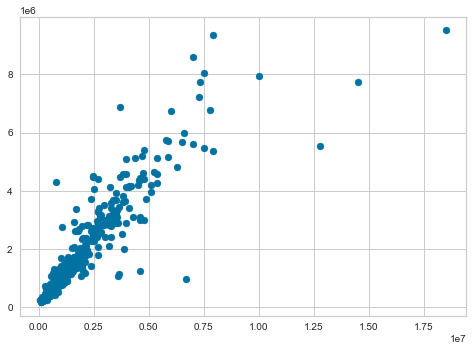

In [48]:
plt.scatter(y_test,y_pred)

In [49]:
## XGBoost

In [50]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [51]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07,0.9], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [52]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=3)
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[17:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [53]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.7792503114049315
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [54]:
params = {'colsample_bytree': [0.7],
          'learning_rate':[0.07], 
          'max_depth':[5],
          'min_child_weight':[4], 
          'n_estimators':[500], 
          'nthread': [4],
          'objective': ['reg:linear'],
          'silent': [1],
          'subsample': [0.7]}

In [55]:
xgb_grid = GridSearchCV(xgb1,
                        params,
                        cv = 7,
                        n_jobs =-1,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

Fitting 7 folds for each of 1 candidates, totalling 7 fits
[18:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=7,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [56]:
print(xgb_grid.best_score_)

0.8069034108650285


In [57]:
##RandomForestRegressor()

In [58]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
reg_rf.score(X_train, y_train)


0.9736685797982586

In [60]:
reg_rf.score(X_test,y_test)

0.8185064185232513

In [61]:
r2_score(y_test,y_pred)

0.8255870848249574

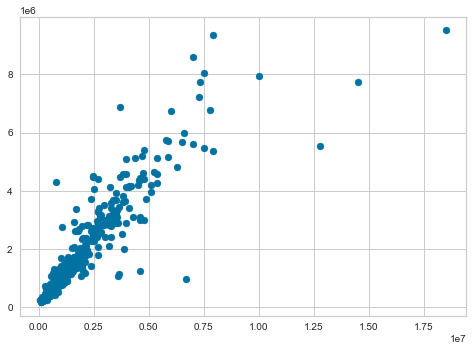

In [62]:
plt.scatter(y_test,y_pred)

In [63]:
##OLS Model

In [64]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     52.04
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        18:00:19   Log-Likelihood:                -42487.
No. Observations:                2882   AIC:                         8.551e+04
Df Residuals:                    2612   BIC:                         8.712e+04
Df Model:                         269                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
key_0                           9.7632    136.910      0.071      0.943    -258.701     278.227
Car_Age                     -1.539e+05   5659.985    -27.197      0.000   -1.65e+05   -1.43e+05
km                             -2.4774      0.318     -7.801      0.000      -3.100      -1.855
Owner                       -1.701e+04   3.37e+04     -0.505      0.613    -8.3e+04     4.9e+04
Company_Name_BMW             3.284e+06   2.04e+05     16.097      0.000    2.88e+06    3.68e+06
Company_Name_CHEVROLET       1.497e+06   2.37e+05      6.323      0.000    1.03e+06    1.96e+06
Company_Name_DATSUN          5.678e+05   1.89e+05      3.004      0.003    1.97e+05    9.38e+05
Company_Name_FIAT            6.829e+05   1.42e+05      4.794      0.000    4.04e+05    9.62e+05
Company_Name_FORD            1.511e+06   1.97e+05      7.656      0.000    1.12e+06     1.9e+06
Company_Name_HONDA           1.498e+06   1.76e+05      8.519      0.000    1.15e+06    1.84e+06
Company_Name_HYUNDAI          1.49e+06   2.19e+05      6.817      0.000    1.06e+06    1.92e+06
Company_Name_JAGUAR          5.889e+06   2.58e+05     22.861      0.000    5.38e+06    6.39e+06
Company_Name_JEEP            2.489e+06   2.35e+05     10.594      0.000    2.03e+06    2.95e+06
Company_Name_KIA             1.716e+06   2.26e+05      7.605      0.000    1.27e+06    2.16e+06
Company_Name_LAND            2.559e+06   1.41e+05     18.200      0.000    2.28e+06    2.83e+06
Company_Name_MAHINDRA        1.515e+06   2.69e+05      5.639      0.000    9.88e+05    2.04e+06
Company_Name_MARUTI SUZUKI   1.386e+06   3.09e+05      4.483      0.000     7.8e+05    1.99e+06
Company_Name_MERCEDES-BENZ   4.477e+06    3.6e+05     12.452      0.000    3.77e+06    5.18e+06
Company_Name_MINI             2.14e+06   3.78e+05      5.660      0.000     1.4e+06    2.88e+06
Company_Name_MITSUBISHI      2.167e+06   3.77e+05      5.753      0.000    1.43e+06     2.9e+06
Company_Name_NISSAN          1.241e+06   3.49e+05      3.557      0.000    5.57e+05    1.93e+06
Company_Name_PORSCHE         6.849e+06   3.79e+05     18.085      0.000    6.11e+06    7.59e+06
Company_Name_RENAULT          1.14e+06    3.7e+05      3.079      0.002    4.14e+05    1.87e+06
Company_Name_SKODA           1.935e+06   3.75e+05      5.163      0.000     1.2e+06    2.67e+06
Company_Name_TATA            1.292e+06   4.09e+05      3.159      0.002     4.9e+05    2.09e+06
Company_Name_TOYOTA          3.104e+06    4.2e+05      7.398      0.000    2.28e+06    3.93e+06
Company_Name_VOLKSWAGEN      1.652e+06   4.57e+05      3.613      0.000    7.56e+05    2.55e+06
Company_Name_VOLVO           3.494e+06   4.91e+05      7.114      0.000    2.53e+06    4.46e+06
location_Bangalore            1.22e+05   7.45e+04      1.639      0.101    -2.4e+04    2.68e+05
location_Bh

In [65]:
## Bagging

In [66]:
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)


def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

In [67]:
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

In [68]:
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))

MSLE : 0.11649844985693902
Root MSLE : 0.3413186925102975
R2 Score : 0.7572716743443473 or 75.7272%


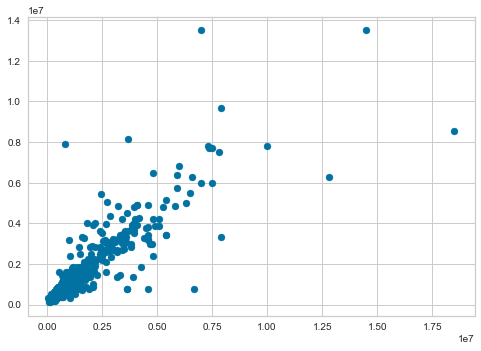

In [69]:
plt.scatter(y_test,y_pred)

In [70]:
## Ada boost

In [71]:

ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [72]:
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

MSLE : 0.07684677887119698
Root MSLE : 0.27721251571889205
R2 Score : 0.8318663979796171 or 83.1866%


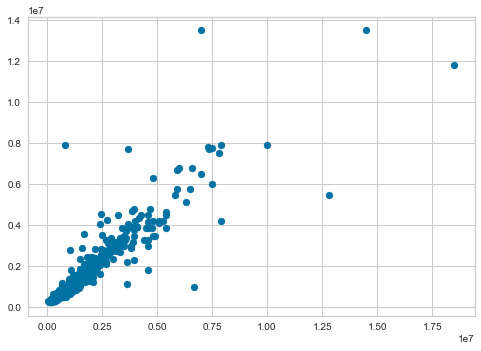

In [73]:
plt.scatter(y_test,y_pred)


In [74]:
## BayesianRidge

In [75]:
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge


In [76]:
# Creating and training model
model = BayesianRidge()
model.fit(X_train, y_train)
  
# Model making a prediction on test data
prediction = model.predict(X_test)
  
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")


r2 Score Of Test Set : 0.032931252748752415


In [77]:
##Ridge Model

In [78]:
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [79]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

print(f"r2 Score Of Test Set : {r2_score(y_test,y_pred)}")

Mean MAE: 381285.851 (40298.755)
r2 Score Of Test Set : 0.7864274153586621


In [80]:
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


MAE: -378884.935
Config: {'alpha': 0.26}


In [81]:
model = Ridge(alpha=0.19)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [82]:
print(f"r2 Score Of Test Set : {r2_score(y_test,y_pred)}")

r2 Score Of Test Set : 0.7975219065395684


In [83]:
## Lasso

In [84]:

lasso=Lasso(alpha=0.19)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [85]:
print(f"r2 Score Of Test Set : {r2_score(y_test,y_pred)}")

r2 Score Of Test Set : 0.794288208091279


In [86]:
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
# define grid
grid = dict()
grid['alpha'] = np.arange(0,1,0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
print(f"r2 Score Of Test Set : {r2_score(y_test,y_pred)}")

MAE: -380490.966
Config: {'alpha': 0.99}
r2 Score Of Test Set : 0.794288208091279


In [91]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(ABR, open(filename, 'wb'))

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [112]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [113]:
result=reg.fit(X_train, y_train)

In [114]:
from sklearn.metrics import mean_squared_error, r2_score
print("R2 value =",result.score(X_train, y_train))

R2 value = 0.8511303918251276


In [115]:
y_pred = reg.predict(X_test)


In [123]:
import pickle
pickle.dump(ABR, open("abr.pkl", "wb"))

# load model from file
model = pickle.load(open("abr.pkl", "rb"))



In [124]:
df_dum.head()

,Owner,Company_Name_BMW,Company_Name_CHEVROLET,Company_Name_DATSUN,Company_Name_FIAT,Company_Name_FORD,Company_Name_HONDA,Company_Name_HYUNDAI,Company_Name_JAGUAR,Company_Name_JEEP,...,Model_XUV500,Model_XYLO,Model_YARIS,Model_YETI,Model_Z4,Model_ZEN LX,Model_ZEST,fuel_Diesel,fuel_LPG,fuel_Petrol
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [125]:
X.head()


,key_0,Car_Age,km,Owner,Company_Name_BMW,Company_Name_CHEVROLET,Company_Name_DATSUN,Company_Name_FIAT,Company_Name_FORD,Company_Name_HONDA,...,Model_XUV500,Model_XYLO,Model_YARIS,Model_YETI,Model_Z4,Model_ZEN LX,Model_ZEST,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0,10,65345,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,3,12000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,7,78000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,8,53055,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,3,14000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
